<a href="https://colab.research.google.com/github/MarlonMarin/PDI/blob/master/Taller2_Perspectiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Acceso al drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Librerias

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

#Llegar a la carpeta del drive

In [19]:
!pwd
%cd /content/drive/My Drive/11-Once/PDI/taller2
!pwd

/content/drive/My Drive/11-Once/PDI/taller2
/content/drive/My Drive/11-Once/PDI/taller2
/content/drive/My Drive/11-Once/PDI/taller2


#Cortar las imagenes

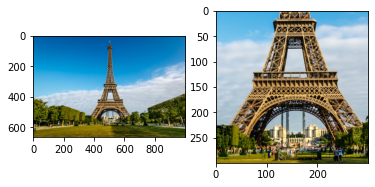

In [40]:
#@title Elige la sub matriz { run: "auto" }
x1 = 300  #@param {type:"slider", min:0, max:1000, step:50}
x2 = 600  #@param {type:"slider", min:0, max:1000, step:50}
y1 = 350  #@param {type:"slider", min:0, max:1000, step:50}
y2 = 650  #@param {type:"slider", min:0, max:1000, step:50}
#leer
img = cv2.imread('torre_grupo1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

corte = img[x1:x2, y1:y2]

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(corte)
plt.show()


# perspectivas

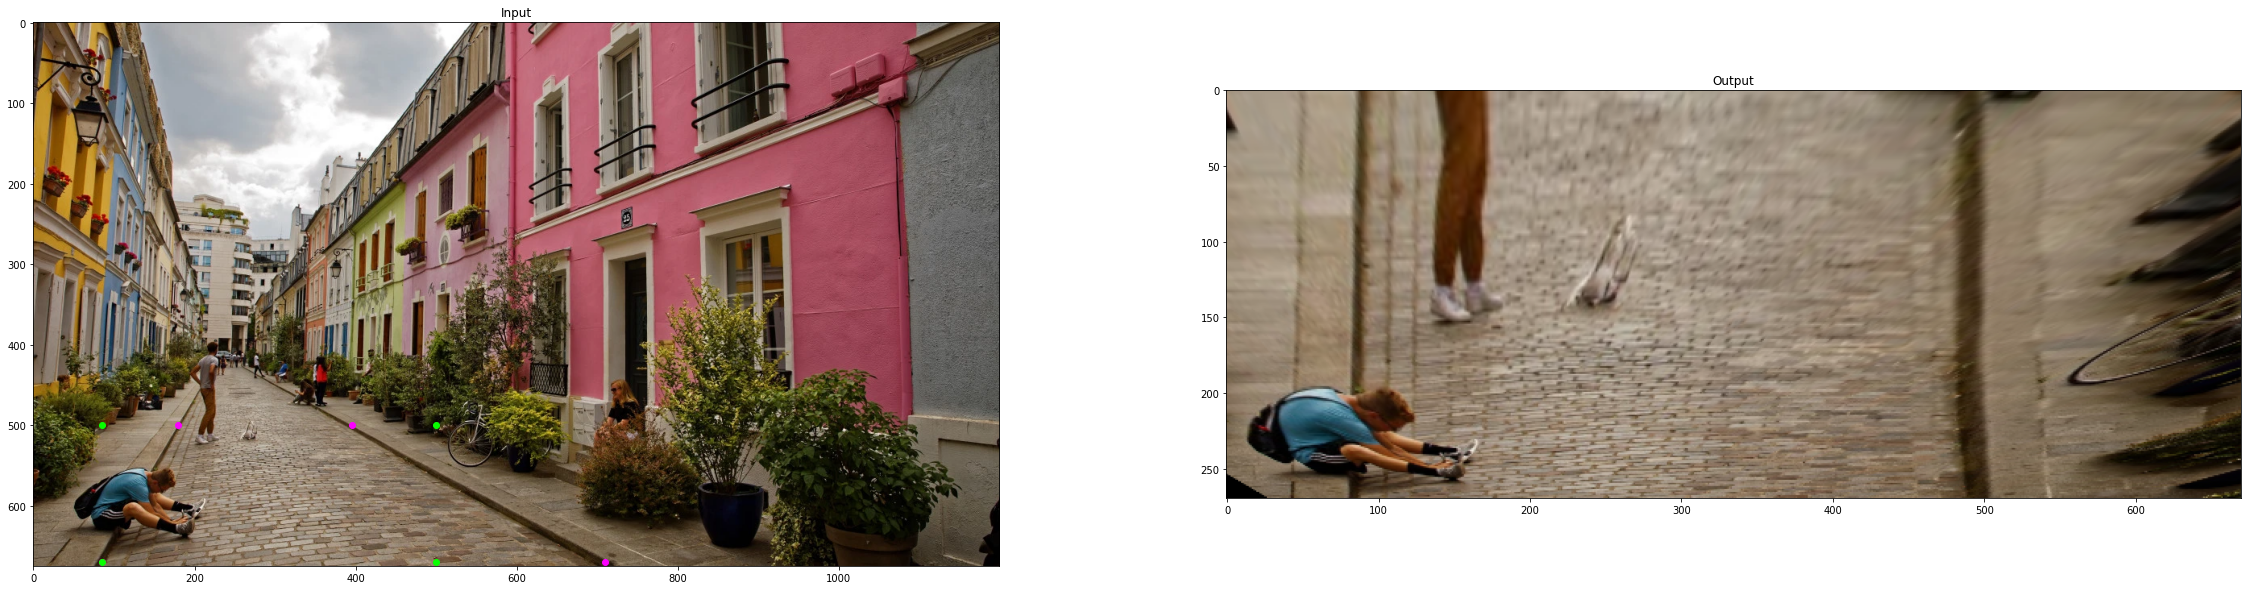

In [117]:
def modificacionPerspectivas(path):
  #leer
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  #tamaño de la imagen
  rows,cols,ch = img.shape

  #creando puntos originales de la foto
  pts1 = np.float32([[180,500],[395,500],[85,670],[710,670]]) # puntos negros

  #Puntos a donde queremos llegar
  pts2 = np.float32([[85,500],[500,500],[85,670],[500,670]]) # puntos rojos

  ##Puntos Violetas
  xE = [180,395,85,710]
  yE = [500,500,670,670]

  ##Puntos verdes
  xS = [85, 500,85,500]
  yS = [500,500,670,670]

  #obtiene la matris de la transformación necesaria para el objetivo
  M = cv2.getPerspectiveTransform(pts1,pts2)

  #creamos la imagen con la información modificada
  #podemos añadir más filas o columnas
  dst = cv2.warpPerspective(img,M,(rows,cols+100))

  #mostrar imagen
  plt.figure(figsize=(40,10))
  plt.subplot(121),plt.imshow(img),plt.title('Input')

  #mostrar puntos
  plt.scatter(xE,yE,color='#FB00FF')
  plt.scatter(xS,yS,color= '#08FF00')
  plt.subplot(122),plt.imshow(dst[400:670, 0:670]),plt.title('Output')
  plt.show()

modificacionPerspectivas('calle1_grupo2.jpg')